$$
\overline{\epsilon}(\omega) = \overline{n}(\omega)^2 = \epsilon_{\infty} + \sum_{j=1}^{N} \frac{S_j \omega_j^2}{\omega_j^2 - \omega^2 - 2 \gamma_j \omega}
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.integrate import quad_vec

def complex_permittivity_zhang1994(omega_cm, material, temperature):
    """
    Compute the complex permittivity for a material at a specific temperature.
    
    Args:
        omega_cm (float/array): Frequency in cm⁻¹.
        material (str): Material name (e.g., 'LaAlO3', 'NdGaO3').
        temperature (int/str): Temperature (e.g., 300, '10, 78').
    
    Returns:
        complex/array: Complex permittivity.
    """
    
    parameters = {
        'LaAlO3': {
            300: {
                'epsilon_inf': 4.0,
                'oscillators': [
                    {'omega': 184,'S': 14.4,'gamma': 4.2},  #1
                    {'omega': 428,'S': 4.1,'gamma': 2.7},   #2
                    {'omega': 496,'S': 0.026,'gamma': 16},  #3
                    {'omega': 652,'S': 0.27,'gamma': 23.5}, #4
                    {'omega': 692,'S': 0.027,'gamma': 32},  #5
                ]
            },
            '10, 78': {
                'epsilon_inf': 4.0,
                'oscillators': [
                    {'omega': 185,'S': 15,'gamma': 3.1},     #1
                    {'omega': 427,'S': 4.2,'gamma': 1.6},    #2
                    {'omega': 498,'S': 0.014,'gamma': 6.5},  #3
                    {'omega': 594,'S': 0.005,'gamma': 7},    #4
                    {'omega': 651,'S': 0.27,'gamma': 15},    #5
                    {'omega': 674,'S': 0.014,'gamma': 49},   #6
                ]
            }
        },
        'LaGaO3': {
            300: {
                'epsilon_inf': 4.1,
                'oscillators': [
                    {'omega': 165,'S': 7.7,'gamma': 2.3},   #1
                    {'omega': 275,'S': 6.7,'gamma': 8},     #2
                    {'omega': 296,'S': 1.1,'gamma': 8},     #3
                    {'omega': 308,'S': 2.0,'gamma': 10},    #4
                    {'omega': 329,'S': 0.64,'gamma': 8},    #5
                    {'omega': 353,'S': 0.029,'gamma': 4.1}, #6
                    {'omega': 416,'S': 0.013,'gamma': 8},   #7
                    {'omega': 510,'S': 0.038,'gamma': 23},  #8
                    {'omega': 536,'S': 0.032,'gamma': 18},  #9
                    {'omega': 597,'S': 0.25,'gamma': 30},   #10
                ]
            }
        },
        'NdGaO3': {
            300: {
                'epsilon_inf': 4.1,
                'oscillators': [
                    {'omega': 118,'S': 0.28,'gamma': 3.3},   #1
                    {'omega': 174,'S': 5.5,'gamma': 5.4},    #2
                    {'omega': 244,'S': 0.22,'gamma': 2.7},   #3
                    {'omega': 255,'S': 0.13,'gamma': 4.9},   #4
                    {'omega': 273,'S': 4.7,'gamma': 6.7},    #5 
                    {'omega': 290,'S': 1.2,'gamma': 6.7},    #6
                    {'omega': 300,'S': 0.53,'gamma': 10.6},  #7
                    {'omega': 321,'S': 1.4,'gamma': 22},     #8
                    {'omega': 343,'S': 2.1,'gamma': 9.6},    #9
                    {'omega': 356,'S': 0.28,'gamma': 6.4},   #10 
                    {'omega': 424,'S': 0.062,'gamma': 7.8}, #11
                    {'omega': 525,'S': 0.074,'gamma': 32}, #12
                    {'omega': 591,'S': 0.17,'gamma': 33}, #13
                ]
            }
        }
    }
    
    if material not in parameters:
        raise ValueError(f"Material '{material}' not in database.")
    if temperature not in parameters[material]:
        raise ValueError(f"Temperature {temperature} not supported for {material}.")
    
    params = parameters[material][temperature]
    epsilon_inf = params['epsilon_inf']
    oscillators = params['oscillators']
    
    omega = np.asarray(omega_cm)
    epsilon = epsilon_inf * np.ones_like(omega, dtype=np.complex128)
    
    for osc in oscillators:
        S = osc['S']
        omega_j = osc['omega']
        gamma_j = osc['gamma']
        
        numerator = S * omega_j**2
        denominator = omega_j**2 - omega**2 - 1j * 2 * gamma_j * omega
        epsilon += numerator / denominator
    
    return epsilon

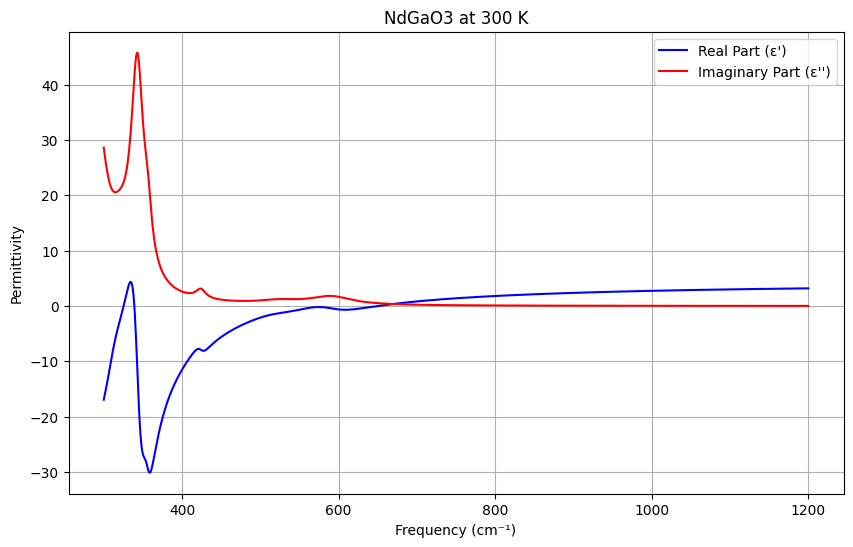

In [5]:
import matplotlib.pyplot as plt

# Frequency range (adjust based on data)
omega_cm = np.linspace(300, 1200, 1000)  # Example: 0-800 cm⁻¹

# Compute permittivity for LaAlO3 at 300 K
material = 'NdGaO3'
temperature = 300#'10, 78 K'#300
epsilon = complex_permittivity_zhang1994(omega_cm, material, temperature)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(omega_cm, epsilon.real, 'b-', label='Real Part (ε\')')
plt.plot(omega_cm, epsilon.imag, 'r-', label='Imaginary Part (ε\'\')')
plt.title(f'{material} at {temperature} K')
plt.xlabel('Frequency (cm⁻¹)')
plt.ylabel('Permittivity')
plt.grid(True)
plt.legend()
# plt.xlim(0, 800)
plt.show()

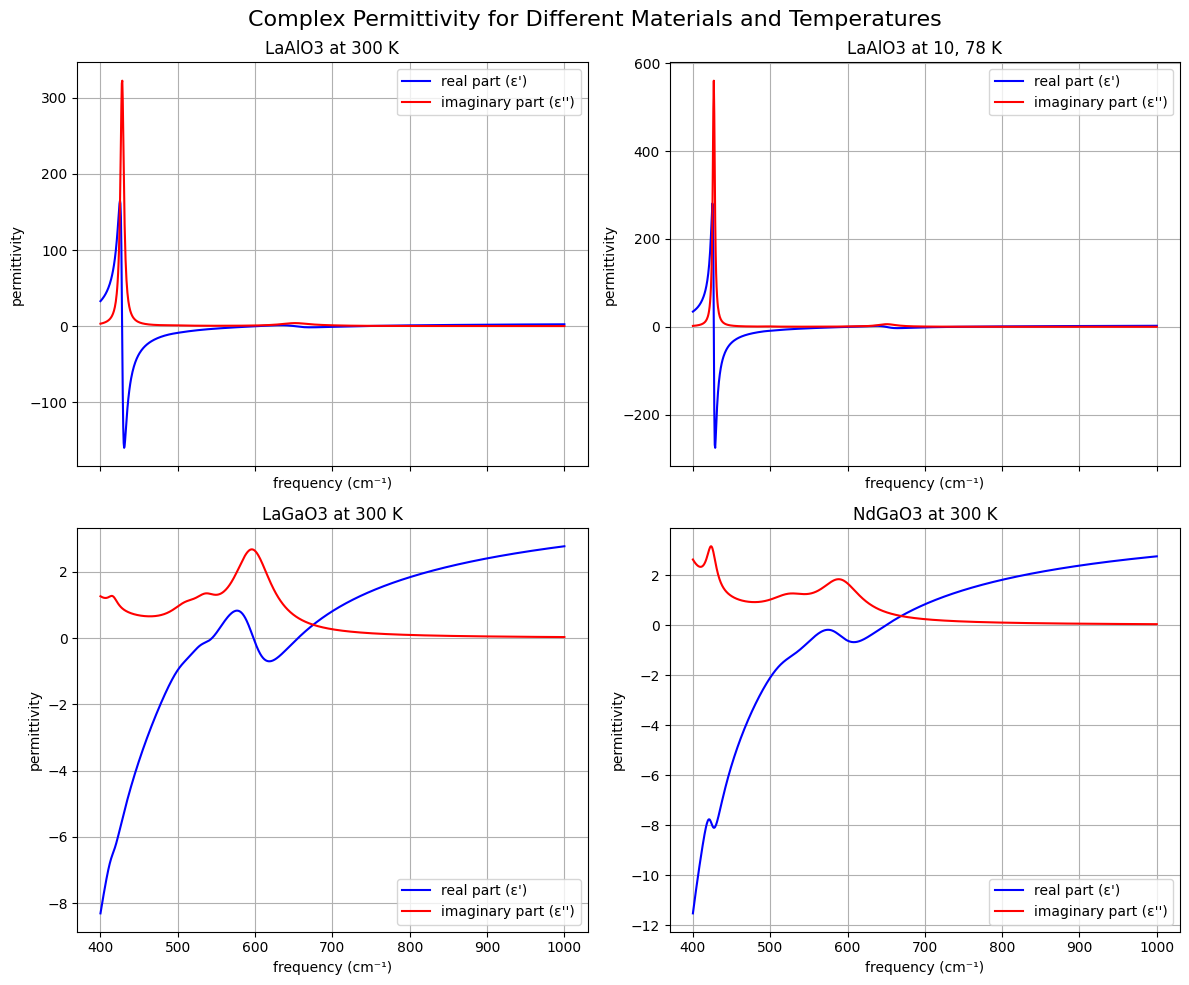

In [6]:
import numpy as np
import matplotlib.pyplot as plt

omega_cm = np.linspace(400, 1000, 1000)  

values_to_plot = [
    ('LaAlO3',300),
    ('LaAlO3','10, 78'),
    ('LaGaO3',300),
    ('NdGaO3',300)
]

fig, axes = plt.subplots(int(len(values_to_plot)/2), 2, figsize=(12, 10), sharex=True)
fig.suptitle('Complex Permittivity for Different Materials and Temperatures', fontsize=16)

axs = axes.flatten()

for i, material_temp in enumerate(values_to_plot):
    material, temperature = material_temp
    epsilon = complex_permittivity_zhang1994(omega_cm, material, temperature)
    
    ax = axs[i]
    ax.plot(omega_cm, epsilon.real, 'b-', label='real part (ε\')')
    ax.plot(omega_cm, epsilon.imag, 'r-', label='imaginary part (ε\'\')')
    ax.set_title(f'{material} at {temperature} K')
    ax.set_xlabel('frequency (cm⁻¹)')
    ax.set_ylabel('permittivity')
    ax.grid(True)
    ax.legend()

plt.tight_layout()  # Adjust for suptitle
plt.show()

In [7]:
@njit
def calculate_beta(epsilon):
    return (epsilon-1)/(epsilon+1)

@njit
def calculate_rp(epsilon_mat, theta_i):
    epsilon_air = 1.0 
    
    n1 = np.sqrt(epsilon_air)   
    n2 = np.sqrt(epsilon_mat)      
    # snell law
    sin_theta_t = (n1 / n2) * np.sin(theta_i)
    cos_theta_t = np.sqrt(1 - sin_theta_t**2)  # non absorvent medium

    rp = (n2 * np.cos(theta_i) - n1 * cos_theta_t) / (n2 * np.cos(theta_i) + n1 * cos_theta_t)
    return rp

@njit
def calculate_f_parameter(g, radius, H, W, L):
    f = (g - (radius +2*H + W)/(2*L))*(np.log(4*L/(radius + 4*H +2*W)))/np.log(4*L/radius)
    return f

@njit
def calculate_H_t(t, A, Omega, H0):
    return H0 + A*(1 - np.cos(Omega*t))

@njit
def calculate_alpha_eff(beta, f0, f1):
    return 1 + 0.5 * (beta*f0)/(1 - beta*f1)

In [8]:
A_PARAMETER = 700**2 #cm⁻2

THETA_I = np.deg2rad(45)  # 45°

G = 0.7*(np.cos(0.06) + 1.0j*np.sin(0.06))

A = 18*1e-9 #m
RADIUS = 20*1e-9 #m
L = 300*1e-9 #m

W0 = 1.31*RADIUS
W1 = 0.5*RADIUS

Omega = 2*np.pi*(250*1e3) #rad/s
H0 = 0

def calculate_integrand(t, omega, n, material = 'LaAlO3', temperature = 300):
    epsilon = complex_permittivity_zhang1994(omega,material,temperature)
    beta = calculate_beta(epsilon)
    rp = calculate_rp(epsilon, THETA_I)
    
    H = calculate_H_t(t, A, Omega, H0)
    f0 = calculate_f_parameter(G, RADIUS, H, W0, L)
    f1 = calculate_f_parameter(G, RADIUS, H, W1, L)

    alpha_eff = calculate_alpha_eff(beta, f0, f1)

    integrand = ((1+rp)**2)*(alpha_eff) * (np.exp(-1.0j * Omega * n * t))
    return integrand




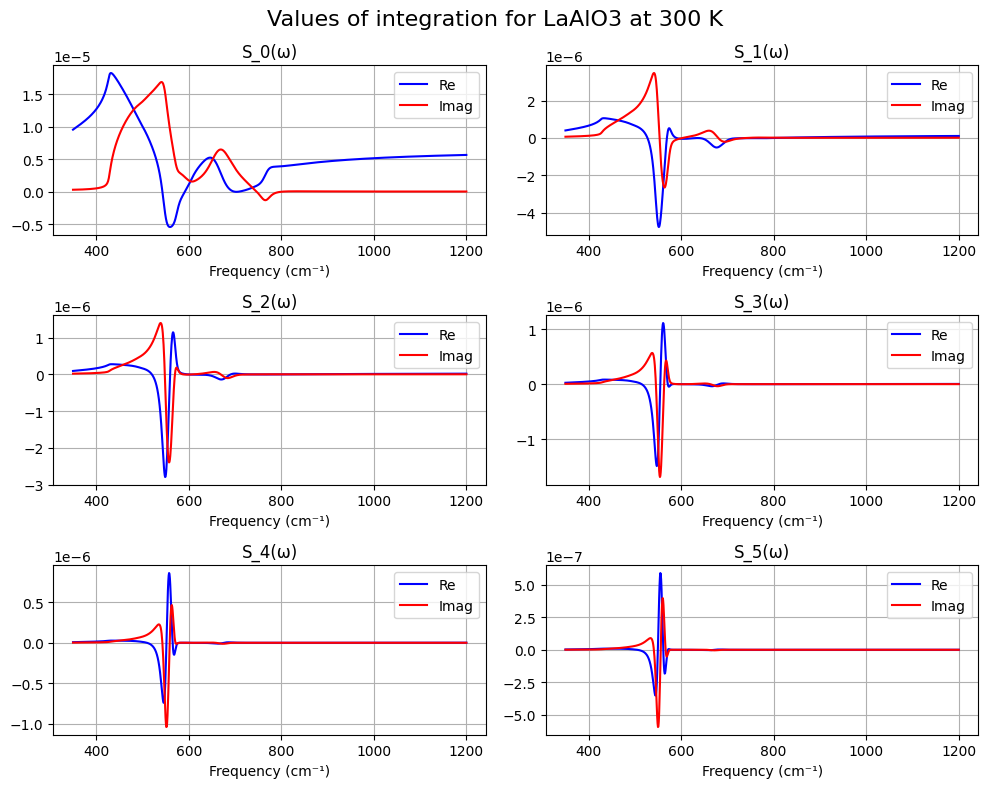

In [9]:
from models.fdm_model import calculate_integrand_for_scattered_field
from models.permittivity import compute_permittivity

material = 'LaAlO3'
temperature = 300
omega_cm = np.linspace(350, 1200, 1000)  # Faixa experimental em cm⁻¹
Omega = 2*np.pi*(250*1e3) #rad/s

n_values = [0, 1, 2, 3, 4, 5]
integrated_values = np.ndarray(shape=[len(omega_cm), len(n_values)], dtype=np.complex128)
 
for i, omega in enumerate(omega_cm):
    epsilon = compute_permittivity(omega, material, temperature)#complex_permittivity_zhang1994(omega, material, temperature)
    for j, n_value in enumerate(n_values):
        result, error = quad_vec(lambda x: calculate_integrand_for_scattered_field(x, epsilon, n_value), 0, 2*np.pi/Omega)
        integrated_values[i, j] = result

fig, axs = plt.subplots(figsize = (10,8),nrows=int(len(n_values)/2), ncols=2)
fig.suptitle(f'Values of integration for {material} at {temperature} K', fontsize=16)
axes = axs.flatten()
for i, n_value in enumerate(n_values):
    axes[i].plot(omega_cm, np.real(integrated_values[:, i]), label='Re', color='blue')
    axes[i].plot(omega_cm, np.imag(integrated_values[:, i]), label='Imag', color='red')
    axes[i].set_xlabel('Frequency (cm⁻¹)')
    axes[i].set_title(f'S_{n_value}(ω)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from

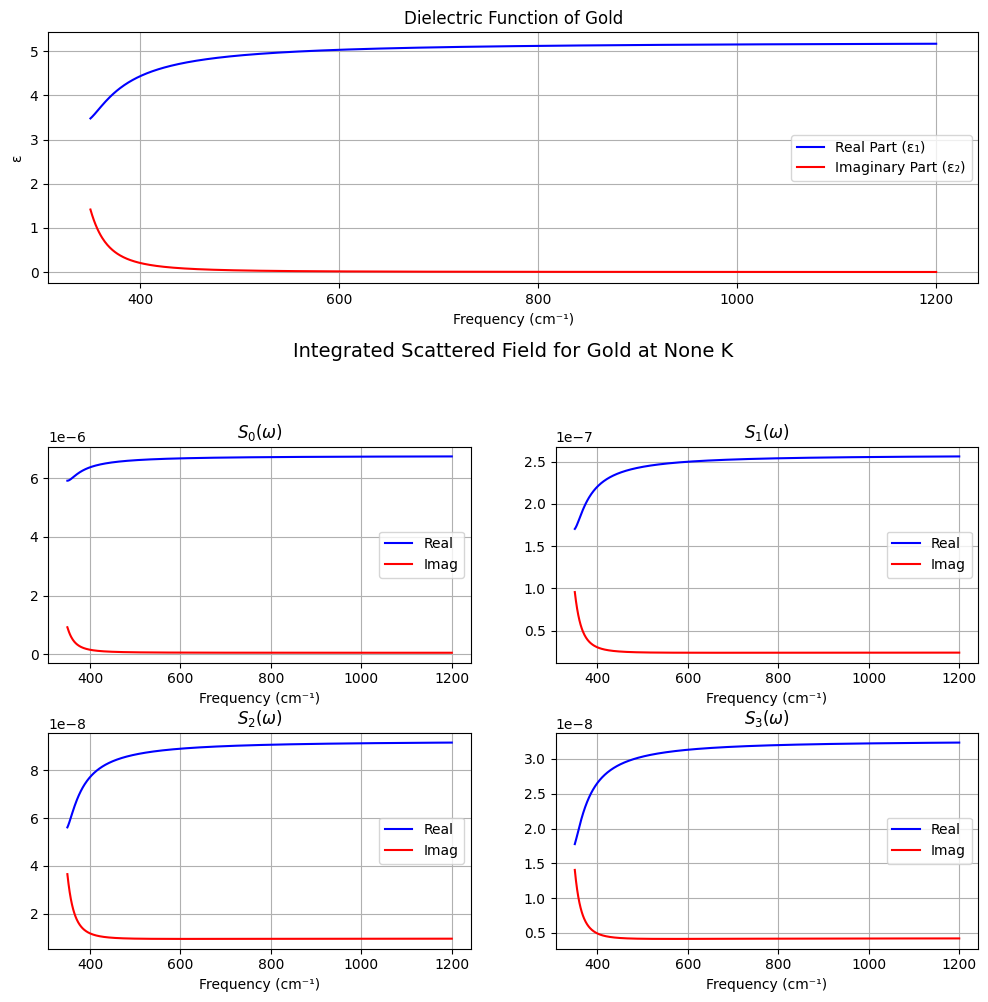

In [3]:
import numpy as np
from evaluation.integrate_scattered_field import integrate_and_plot_scattered_field

material = 'Gold'  # Adjust key as defined in your MATERIAL_LIBRARY.
temperature = None
omega_cm = np.linspace(350, 1200, 1000)  # Frequency range in cm⁻¹
n_values = [0,1,2,3]
Omega = 2 * np.pi * (250e3)  # Example value for Omega

# Run the integration and plot the results
integrated_values, fig = integrate_and_plot_scattered_field(material, temperature, omega_cm, n_values, Omega)

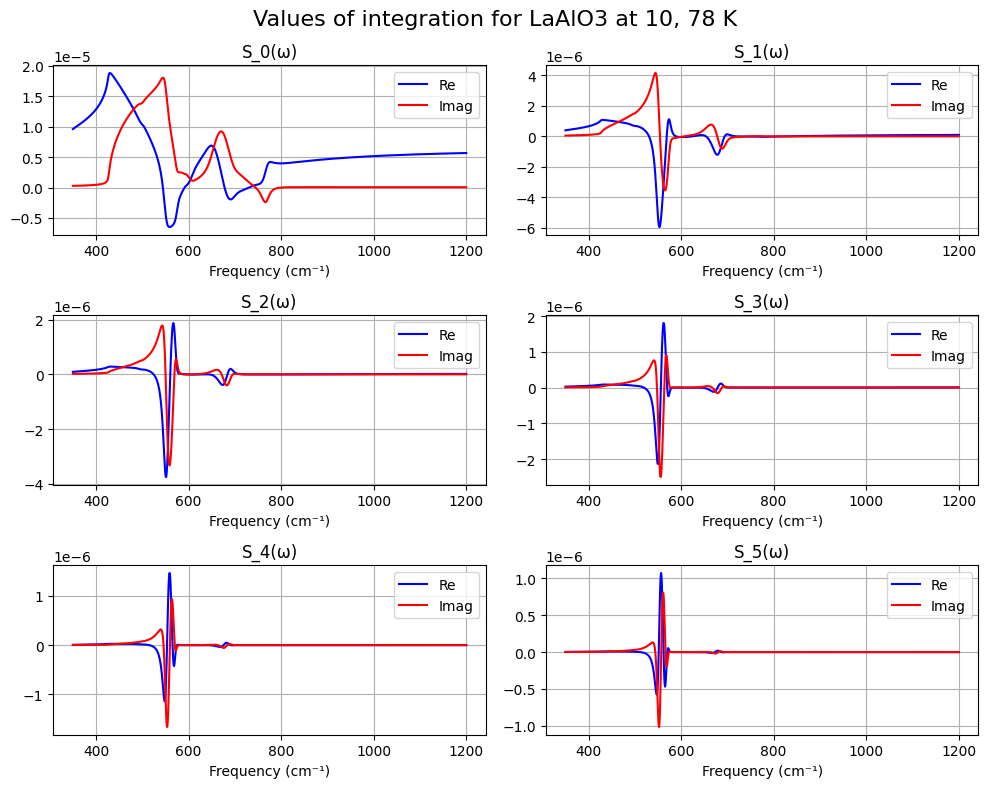

In [11]:
material = 'LaAlO3'
temperature = '10, 78'
omega_cm = np.linspace(350, 1200, 1000)  # Faixa experimental em cm⁻¹

n_values = [0, 1, 2, 3, 4, 5]
integrated_values = np.ndarray(shape=[len(omega_cm), len(n_values)], dtype=np.complex128)
 
for i, omega in enumerate(omega_cm):
    for j, n_value in enumerate(n_values):
        result, error = quad_vec(lambda x: calculate_integrand(x, omega, n_value, material, temperature), 0, 2*np.pi/Omega)
        integrated_values[i, j] = result

fig, axs = plt.subplots(figsize = (10,8),nrows=int(len(n_values)/2), ncols=2)
fig.suptitle(f'Values of integration for {material} at {temperature} K', fontsize=16)
axes = axs.flatten()
for i, n_value in enumerate(n_values):
    axes[i].plot(omega_cm, np.real(integrated_values[:, i]), label='Re', color='blue')
    axes[i].plot(omega_cm, np.imag(integrated_values[:, i]), label='Imag', color='red')
    axes[i].set_xlabel('Frequency (cm⁻¹)')
    axes[i].set_title(f'S_{n_value}(ω)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

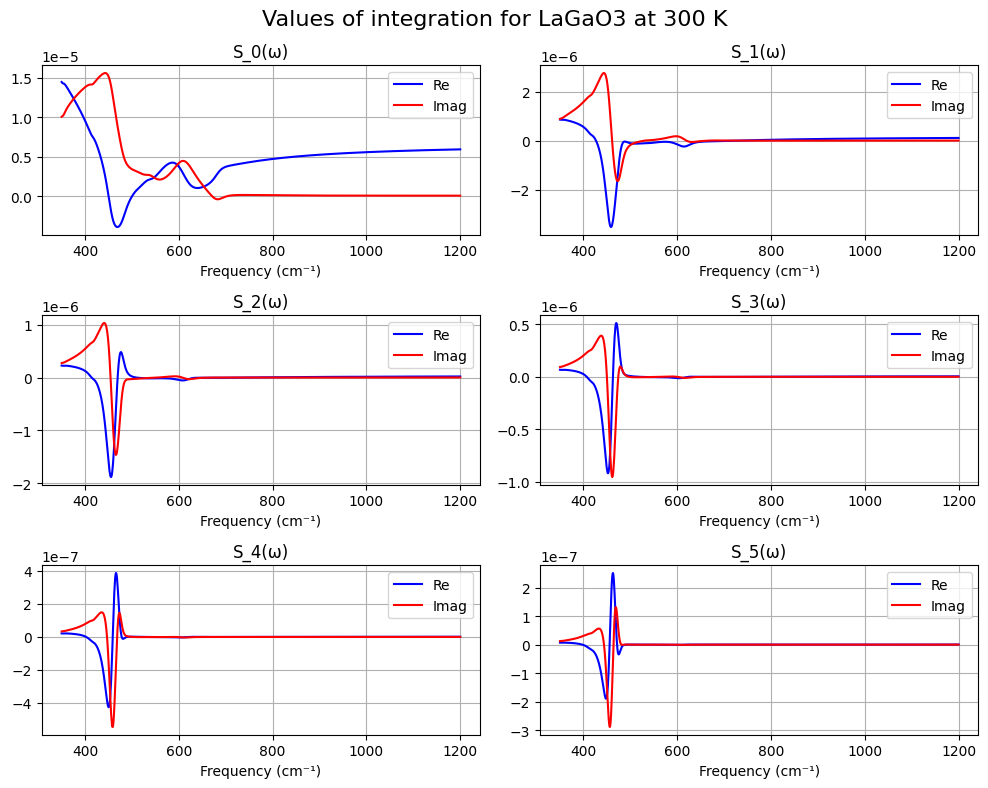

In [12]:
material = 'LaGaO3'
temperature = 300
omega_cm = np.linspace(350, 1200, 1000)  # Faixa experimental em cm⁻¹

n_values = [0, 1, 2, 3, 4, 5]
integrated_values = np.ndarray(shape=[len(omega_cm), len(n_values)], dtype=np.complex128)
 
for i, omega in enumerate(omega_cm):
    for j, n_value in enumerate(n_values):
        result, error = quad_vec(lambda x: calculate_integrand(x, omega, n_value, material, temperature), 0, 2*np.pi/Omega)
        integrated_values[i, j] = result

fig, axs = plt.subplots(figsize = (10,8),nrows=int(len(n_values)/2), ncols=2)
fig.suptitle(f'Values of integration for {material} at {temperature} K', fontsize=16)
axes = axs.flatten()
for i, n_value in enumerate(n_values):
    axes[i].plot(omega_cm, np.real(integrated_values[:, i]), label='Re', color='blue')
    axes[i].plot(omega_cm, np.imag(integrated_values[:, i]), label='Imag', color='red')
    axes[i].set_xlabel('Frequency (cm⁻¹)')
    axes[i].set_title(f'S_{n_value}(ω)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

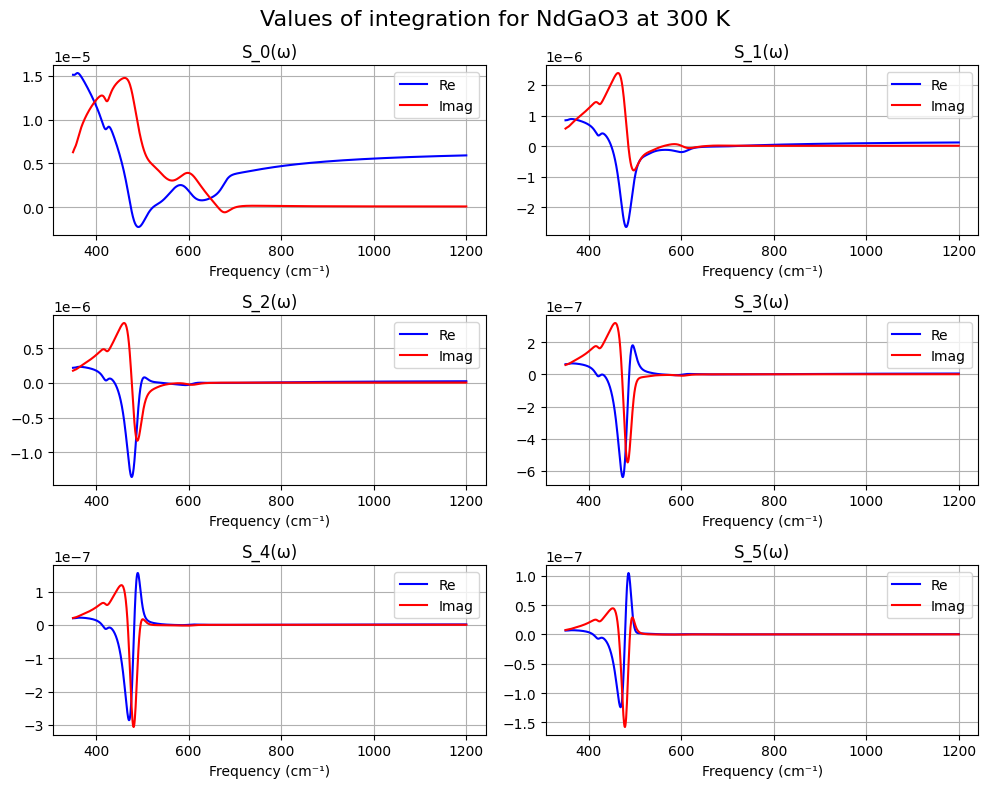

In [13]:
material = 'NdGaO3'
temperature = 300
omega_cm = np.linspace(350, 1200, 1000)  # Faixa experimental em cm⁻¹

n_values = [0, 1, 2, 3, 4, 5]
integrated_values = np.ndarray(shape=[len(omega_cm), len(n_values)], dtype=np.complex128)
 
for i, omega in enumerate(omega_cm):
    for j, n_value in enumerate(n_values):
        result, error = quad_vec(lambda x: calculate_integrand(x, omega, n_value, material, temperature), 0, 2*np.pi/Omega)
        integrated_values[i, j] = result

fig, axs = plt.subplots(figsize = (10,8),nrows=int(len(n_values)/2), ncols=2)
fig.suptitle(f'Values of integration for {material} at {temperature} K', fontsize=16)
axes = axs.flatten()
for i, n_value in enumerate(n_values):
    axes[i].plot(omega_cm, np.real(integrated_values[:, i]), label='Re', color='blue')
    axes[i].plot(omega_cm, np.imag(integrated_values[:, i]), label='Imag', color='red')
    axes[i].set_xlabel('Frequency (cm⁻¹)')
    axes[i].set_title(f'S_{n_value}(ω)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()